In [ ]:
import re
import os 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Raw_walking normal

In [2]:
import pandas as pd
import re
import os

subjects = {
    'sub_01': 'Akram Shojaei',
    'sub_02': 'Ali Aghapour',
    'sub_03': 'Behnaz Behara',
    'sub_04': 'Farzad Moghaddam',
    'sub_05': 'Hasti Keshavarzi',
    'sub_06': 'Maliheh Maleki',
    'sub_07': 'Masud Bak Khoshnevis',
    'sub_08': 'Mobina Jamali',
    'sub_09': 'Nadia Khalili',
    'sub_10': 'Shahab Meghdadi',
    'sub_11': 'Shayan farab',
    'sub_12': 'Soroush Rezaei'
}

conditions = [
    '1) walking normal', 
    '2) walking fast', 
    '3) weight normal', 
    '4) weight fast',
    '5) brace normal', 
    '6) brace fast', 
    '7) brace_weight normal', 
    '8) brace_weight fast'
]

input_file_names = [
    'RAW_walking normal.csv', 
    'RAW_walking fast.csv', 
    'RAW_weight normal.csv', 
    'RAW_weight fast.csv',
    'RAW_brace normal.csv', 
    'RAW_brace fast.csv', 
    'RAW_brace weight normal.csv', 
    'RAW_brace weight fast.csv'
]

base_dir = 'C:/Users/Arash/Desktop/Hanieh Moradi - Dataset/'

# Define the desired column order
desired_column_order = [
    'Time_LeftFoot', 'AccX_LeftFoot', 'AccY_LeftFoot', 'AccZ_LeftFoot', 'GyroX_LeftFoot', 'GyroY_LeftFoot', 'GyroZ_LeftFoot', 'MagX_LeftFoot', 'MagY_LeftFoot', 'MagZ_LeftFoot',
    'Time_RightFoot', 'AccX_RightFoot', 'AccY_RightFoot', 'AccZ_RightFoot', 'GyroX_RightFoot', 'GyroY_RightFoot', 'GyroZ_RightFoot', 'MagX_RightFoot', 'MagY_RightFoot', 'MagZ_RightFoot',
    'Time_LeftShank', 'AccX_LeftShank', 'AccY_LeftShank', 'AccZ_LeftShank', 'GyroX_LeftShank', 'GyroY_LeftShank', 'GyroZ_LeftShank', 'MagX_LeftShank', 'MagY_LeftShank', 'MagZ_LeftShank',
    'Time_RightShank', 'AccX_RightShank', 'AccY_RightShank', 'AccZ_RightShank', 'GyroX_RightShank', 'GyroY_RightShank', 'GyroZ_RightShank', 'MagX_RightShank', 'MagY_RightShank', 'MagZ_RightShank',
    'Time_LeftThigh', 'AccX_LeftThigh', 'AccY_LeftThigh', 'AccZ_LeftThigh', 'GyroX_LeftThigh', 'GyroY_LeftThigh', 'GyroZ_LeftThigh', 'MagX_LeftThigh', 'MagY_LeftThigh', 'MagZ_LeftThigh',
    'Time_RightThigh', 'AccX_RightThigh', 'AccY_RightThigh', 'AccZ_RightThigh', 'GyroX_RightThigh', 'GyroY_RightThigh', 'GyroZ_RightThigh', 'MagX_RightThigh', 'MagY_RightThigh', 'MagZ_RightThigh',
    'Time_LeftHumerus', 'AccX_RightHumerus', 'AccY_RightHumerus', 'AccZ_RightHumerus', 'GyroX_LeftHumerus', 'GyroY_LeftHumerus', 'GyroZ_LeftHumerus', 'MagX_LeftHumerus', 'MagY_LeftHumerus', 'MagZ_LeftHumerus',
    'Time_RightHumerus', 'AccX_RightHumerus', 'AccY_RightHumerus', 'AccZ_RightHumerus', 'GyroX_RightHumerus', 'GyroY_RightHumerus', 'GyroZ_RightHumerus', 'MagX_RightHumerus', 'MagY_RightHumerus', 'MagZ_RightHumerus',
    'Time_Pelvic', 'AccX_Pelvic', 'AccY_Pelvic', 'AccZ_Pelvic', 'GyroX_Pelvic', 'GyroY_Pelvic', 'GyroZ_Pelvic', 'MagX_Pelvic', 'MagY_Pelvic', 'MagZ_Pelvic',
    'Time_Trunk', 'AccX_Trunk', 'AccY_Trunk', 'AccZ_Trunk', 'GyroX_Trunk', 'GyroY_Trunk', 'GyroZ_Trunk', 'MagX_Trunk', 'MagY_Trunk', 'MagZ_Trunk'
]

for subject, sub_name in subjects.items():
    for condition, input_file_name in zip(conditions, input_file_names):
        input_dir = os.path.join(base_dir, 'Datas', sub_name, condition).replace('\\', '/')
        output_dir = os.path.join(base_dir, 'modified data', subject, condition.replace(') ', '_'))
        os.makedirs(output_dir, exist_ok=True)
        input_file_path = os.path.join(input_dir, input_file_name)

        if os.path.isfile(input_file_path):
            data = pd.read_csv(input_file_path)
            first_row = pd.DataFrame(data.iloc[0]).index
            words = list(str(word).strip() for word in first_row)
            names = [
                word for word in words if word and not re.search(r'\d', word)]
            new_col_names = []

            for i in range(len(first_row)):
                name = names[i // 10]
                sensor = ['Time', 'AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ'][i % 10]
                new_col_names.append(f'{sensor}_{name}')

            data.columns = new_col_names
            data = data.iloc[1:]

            # Sort the columns using the desired column order
            data = data.reindex(columns=desired_column_order)

            output_file_name = input_file_name
            output_file = os.path.join(output_dir, output_file_name)
            data.to_csv(output_file, index=False)

        else:
            print(f"Input file not found: {input_file_path}")

C:\Users\Arash\AppData\Local\Temp\ipykernel_25808\2121711243.py:56: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file_path)
C:\Users\Arash\AppData\Local\Temp\ipykernel_25808\2121711243.py:56: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file_path)
C:\Users\Ara

walking normal

In [3]:
import pandas as pd
import re
import os

subjects = {
    'sub_01': 'Akram Shojaei',
    'sub_02': 'Ali Aghapour',
    'sub_03': 'Behnaz Behara',
    'sub_04': 'Farzad Moghaddam',
    'sub_05': 'Hasti Keshavarzi',
    'sub_06': 'Maliheh Maleki',
    'sub_07': 'Masud Bak Khoshnevis',
    'sub_08': 'Mobina Jamali',
    'sub_09': 'Nadia Khalili',
    'sub_10': 'Shahab Meghdadi',
    'sub_11': 'Shayan farab',
    'sub_12': 'Soroush Rezaei'
}

conditions = [
    '1) walking normal',
    '2) walking fast',
    '3) weight normal',
    '4) weight fast',
    '5) brace normal',
    '6) brace fast',
    '7) brace_weight normal',
    '8) brace_weight fast'
]

input_file_names = [
    'walking normal.csv',
    'walking fast.csv',
    'weight normal.csv',
    'weight fast.csv',
    'brace normal.csv',
    'brace fast.csv',
    'brace weight normal.csv',
    'brace weight fast.csv'
]

desired_column_order = ['Time_LeftFoot', 'Q0_LeftFoot', 'Q1_LeftFoot', 'Q2_LeftFoot', 'Q3_LeftFoot', 'Acc_X_LeftFoot', 'Acc_Y_LeftFoot', 'Acc_Z_LeftFoot', 'Acc_linX_LeftFoot', 'Acc_linY_LeftFoot', 'Acc_linZ_LeftFoot', 'Acc_GlinX_LeftFoot', 'Acc_GlinY_LeftFoot', 'Acc_GlinZ_LeftFoot',
                        'Time_RightFoot', 'Q0_RightFoot', 'Q1_RightFoot', 'Q2_RightFoot', 'Q3_RightFoot', 'Acc_X_RightFoot', 'Acc_Y_RightFoot', 'Acc_Z_RightFoot', 'Acc_linX_RightFoot', 'Acc_linY_RightFoot', 'Acc_linZ_RightFoot', 'Acc_GlinX_RightFoot', 'Acc_GlinY_RightFoot', 'Acc_GlinZ_RightFoot',
                        'Time_LeftShank', 'Q0_LeftShank', 'Q1_LeftShank', 'Q2_LeftShank', 'Q3_LeftShank', 'Acc_X_LeftShank', 'Acc_Y_LeftShank', 'Acc_Z_LeftShank', 'Acc_linX_LeftShank', 'Acc_linY_LeftShank', 'Acc_linZ_LeftShank', 'Acc_GlinX_LeftShank', 'Acc_GlinY_LeftShank', 'Acc_GlinZ_LeftShank',
                        'Time_RightShank', 'Q0_RightShank', 'Q1_RightShank', 'Q2_RightShank', 'Q3_RightShank', 'Acc_X_RightShank', 'Acc_Y_RightShank', 'Acc_Z_RightShank', 'Acc_linX_RightShank', 'Acc_linY_RightShank', 'Acc_linZ_RightShank', 'Acc_GlinX_RightShank', 'Acc_GlinY_RightShank', 'Acc_GlinZ_RightShank',
                        'Time_LeftThigh', 'Q0_LeftThigh', 'Q1_LeftThigh', 'Q2_LeftThigh', 'Q3_LeftThigh', 'Acc_X_LeftThigh', 'Acc_Y_LeftThigh', 'Acc_Z_LeftThigh', 'Acc_linX_LeftThigh', 'Acc_linY_LeftThigh', 'Acc_linZ_LeftThigh', 'Acc_GlinX_LeftThigh', 'Acc_GlinY_LeftThigh', 'Acc_GlinZ_LeftThigh',
                        'Time_RightThigh', 'Q0_RightThigh', 'Q1_RightThigh', 'Q2_RightThigh', 'Q3_RightThigh', 'Acc_X_RightThigh', 'Acc_Y_RightThigh', 'Acc_Z_RightThigh', 'Acc_linX_RightThigh', 'Acc_linY_RightThigh', 'Acc_linZ_RightThigh', 'Acc_GlinX_RightThigh', 'Acc_GlinY_RightThigh', 'Acc_GlinZ_RightThigh',
                        'Time_LeftHumerus', 'Q0_LeftHumerus', 'Q1_LeftHumerus', 'Q2_LeftHumerus', 'Q3_LeftHumerus', 'Acc_X_LeftHumerus', 'Acc_Y_LeftHumerus', 'Acc_Z_LeftHumerus', 'Acc_linX_LeftHumerus', 'Acc_linY_LeftHumerus', 'Acc_linZ_LeftHumerus', 'Acc_GlinX_LeftHumerus', 'Acc_GlinY_LeftHumerus', 'Acc_GlinZ_LeftHumerus',
                        'Time_RightHumerus', 'Q0_RightHumerus', 'Q1_RightHumerus', 'Q2_RightHumerus', 'Q3_RightHumerus', 'Acc_X_RightHumerus', 'Acc_Y_RightHumerus', 'Acc_Z_RightHumerus', 'Acc_linX_RightHumerus', 'Acc_linY_RightHumerus', 'Acc_linZ_RightHumerus', 'Acc_GlinX_RightHumerus', 'Acc_GlinY_RightHumerus', 'Acc_GlinZ_RightHumerus',
                        'Time_Pelvic', 'Q0_Pelvic', 'Q1_Pelvic', 'Q2_Pelvic', 'Q3_Pelvic', 'Acc_X_Pelvic', 'Acc_Y_Pelvic', 'Acc_Z_Pelvic', 'Acc_linX_Pelvic', 'Acc_linY_Pelvic', 'Acc_linZ_Pelvic', 'Acc_GlinX_Pelvic', 'Acc_GlinY_Pelvic', 'Acc_GlinZ_Pelvic',
                        'Time_Trunk', 'Q0_Trunk', 'Q1_Trunk', 'Q2_Trunk', 'Q3_Trunk', 'Acc_X_Trunk', 'Acc_Y_Trunk', 'Acc_Z_Trunk', 'Acc_linX_Trunk', 'Acc_linY_Trunk', 'Acc_linZ_Trunk', 'Acc_GlinX_Trunk', 'Acc_GlinY_Trunk', 'Acc_GlinZ_Trunk'
                        ]


base_dir = 'C:/Users/Arash/Desktop/Hanieh Moradi - Dataset/'


for subject, sub_name in subjects.items():
    for condition, input_file_name in zip(conditions, input_file_names):
        input_dir = os.path.join(
            base_dir, 'Datas', sub_name, condition).replace('\\', '/')
        output_dir = os.path.join(
            base_dir, 'modified data', subject, condition.replace(') ', '_'))
        os.makedirs(output_dir, exist_ok=True)
        input_file_path = os.path.join(input_dir, input_file_name)

        if os.path.isfile(input_file_path):
            data = pd.read_csv(input_file_path)
            first_row = pd.DataFrame(data.iloc[0]).index
            words = list(str(word).strip() for word in first_row)
            names = [
                word for word in words if word and not re.search(r'\d', word)]
            new_col_names = []

            for i in range(len(first_row)):
                name = names[i // 14]
                sensor = ['Time', 'Q0', 'Q1', 'Q2', 'Q3', 'Acc_X', 'Acc_Y', 'Acc_Z',
                          'Acc_linX', 'Acc_linY', 'Acc_linZ', 'Acc_GlinX', 'Acc_GlinY', 'Acc_GlinZ'][i % 14]  # Get the sensor name
                new_col_names.append(f'{sensor}_{name}')

            data.columns = new_col_names
            data = data.iloc[1:]

            # Sort the columns using the desired column order
            data = data.reindex(columns=desired_column_order)

            output_file_name = input_file_name
            output_file = os.path.join(output_dir, output_file_name)
            data.to_csv(output_file, index=False)

        else:
            print(f"Input file not found: {input_file_path}")
            

C:\Users\Arash\AppData\Local\Temp\ipykernel_25808\3196870311.py:68: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file_path)
C:\Users\Arash\AppData\Local\Temp\ipykernel_25808\3196870311.py:68: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,8

walking normal Euler

In [4]:
import pandas as pd
import re
import os

subjects = {
    'sub_01': 'Akram Shojaei',
    'sub_02': 'Ali Aghapour',
    'sub_03': 'Behnaz Behara',
    'sub_04': 'Farzad Moghaddam',
    'sub_05': 'Hasti Keshavarzi',
    'sub_06': 'Maliheh Maleki',
    'sub_07': 'Masud Bak Khoshnevis',
    'sub_08': 'Mobina Jamali',
    'sub_09': 'Nadia Khalili',
    'sub_10': 'Shahab Meghdadi',
    'sub_11': 'Shayan farab',
    'sub_12': 'Soroush Rezaei'
}

conditions = [
    '1) walking normal',
    '2) walking fast',
    '3) weight normal',
    '4) weight fast',
    '5) brace normal',
    '6) brace fast',
    '7) brace_weight normal',
    '8) brace_weight fast'
]

input_file_names = [
    'walking normal_Euler.csv',
    'walking fast_Euler.csv',
    'weight normal_Euler.csv',
    'weight fast_Euler.csv',
    'brace normal_Euler.csv',
    'brace fast_Euler.csv',
    'brace weight normal_Euler.csv',
    'brace weight fast_Euler.csv'
]

desired_column_order = ['Time_LeftFoot', 'Roll_LeftFoot', 'Pitch_LeftFoot', 'Yaw_LeftFoot',
                        'Time_RightFoot', 'Roll_RightFoot', 'Pitch_RightFoot', 'Yaw_RightFoot',
                        'Time_LeftShank', 'Roll_LeftShank', 'Pitch_LeftShank', 'Yaw_LeftShank',
                        'Time_RightShank', 'Roll_RightShank', 'Pitch_RightShank', 'Yaw_RightShank',
                        'Time_LeftThigh', 'Roll_LeftThigh', 'Pitch_LeftThigh', 'Yaw_LeftThigh',
                        'Time_RightThigh', 'Roll_RightThigh', 'Pitch_RightThigh', 'Yaw_RightThigh',
                        'Time_LeftHumerus', 'Roll_LeftHumerus', 'Pitch_LeftHumerus', 'Yaw_LeftHumerus',
                        'Time_RightHumerus', 'Roll_RightHumerus', 'Pitch_RightHumerus', 'Yaw_RightHumerus',
                        'Time_Pelvic', 'Roll_Pelvic', 'Pitch_Pelvic', 'Yaw_Pelvic',
                        'Time_Trunk', 'Roll_Trunk', 'Pitch_Trunk', 'Yaw_Trunk'
                        ]

base_dir = 'C:/Users/Arash/Desktop/Hanieh Moradi - Dataset/'

for subject, sub_name in subjects.items():
    for condition, input_file_name in zip(conditions, input_file_names):
        input_dir = os.path.join(base_dir, 'Datas', sub_name, condition).replace('\\', '/')
        output_dir = os.path.join(base_dir, 'modified data', subject, condition.replace(') ', '_'))

        # Create the output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)

        input_file_path = os.path.join(input_dir, input_file_name)
        if os.path.isfile(input_file_path):
            data = pd.read_csv(input_file_path)
            first_row = pd.DataFrame(data.iloc[0]).index

            # Convert the index to a list of strings
            words = list(str(word).strip() for word in first_row)

            # Remove empty strings and strings containing numbers
            names = [word for word in words if word and not re.search(r'\d', word)]

            # Create a list of column names
            new_col_names = []
            for i in range(len(first_row)):
                name = names[i // 4]  # Get the corresponding name
                sensor = ['Time', 'Roll', 'Pitch', 'Yaw'][i % 4]  # Get the sensor name
                # Create the new column name
                new_col_names.append(f'{sensor}_{name}')

            # Rename the columns
            data.columns = new_col_names

            # Remove the first row
            data = data.iloc[1:]
            
            # Sort the columns using the desired column order
            data = data.reindex(columns=desired_column_order)

            output_file_name = input_file_name

            # Construct the output file path
            output_file = os.path.join(output_dir, output_file_name)

            # Save the updated DataFrame to the output file
            data.to_csv(output_file, index=False)
        else:
            print(f"Input file not found: {input_file_path}")

C:\Users\Arash\AppData\Local\Temp\ipykernel_25808\2789459823.py:66: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file_path)


walking normal_Joints_Kinematics

In [5]:
import pandas as pd
import re
import os

subjects = {
    'sub_01': 'Akram Shojaei',
    'sub_02': 'Ali Aghapour',
    'sub_03': 'Behnaz Behara',
    'sub_04': 'Farzad Moghaddam',
    'sub_05': 'Hasti Keshavarzi',
    'sub_06': 'Maliheh Maleki',
    'sub_07': 'Masud Bak Khoshnevis',
    'sub_08': 'Mobina Jamali',
    'sub_09': 'Nadia Khalili',
    'sub_10': 'Shahab Meghdadi',
    'sub_11': 'Shayan Farab',
    'sub_12': 'Soroush Rezaei'
}

conditions = [
    '1) walking normal', 
    '2) walking fast', 
    '3) weight normal', 
    '4) weight fast',
    '5) brace normal', 
    '6) brace fast', 
    '7) brace_weight normal', 
    '8) brace_weight fast'
]

input_file_names = [
    'walking normal_Joints_Kinematics.csv', 
    'walking fast_Joints_Kinematics.csv',
    'weight normal_Joints_Kinematics.csv', 
    'weight fast_Joints_Kinematics.csv',
    'brace normal_Joints_Kinematics.csv', 
    'brace fast_Joints_Kinematics.csv',
    'brace weight normal_Joints_Kinematics.csv', 
    'brace weight fast_Joints_Kinematics.csv'
]

base_dir = 'C:/Users/Arash/Desktop/Hanieh Moradi - Dataset/'

# Define the desired column order
desired_column_order = [
    'Time_LeftAnkle', 'Abduction-Adduction_LeftAnkle', 'Internal-External Rotat_LeftAnkle', 'Flexion-Extension_LeftAnkle',
    'Time_RightAnkle', 'Abduction-Adduction_RightAnkle', 'Internal-External Rotat_RightAnkle', 'Flexion-Extension_RightAnkle',
    'Time_LeftKnee', 'Abduction-Adduction_LeftKnee', 'Internal-External Rotat_LeftKnee', 'Flexion-Extension_LeftKnee',
    'Time_RightKnee', 'Abduction-Adduction_RightKnee', 'Internal-External Rotat_RightKnee', 'Flexion-Extension_RightKnee',
    'Time_LeftHip', 'Abduction-Adduction_LeftHip', 'Internal-External Rotat_LeftHip', 'Flexion-Extension_LeftHip',
    'Time_RightHip', 'Abduction-Adduction_RightHip', 'Internal-External Rotat_RightHip', 'Flexion-Extension_RightHip',
    'Time_LeftShoulder', 'Abduction-Adduction_LeftShoulder', 'Internal-External Rotat_LeftShoulder', 'Flexion-Extension_LeftShoulder',
    'Time_RightShoulder', 'Abduction-Adduction_RightShoulder', 'Internal-External Rotat_RightShoulder', 'Flexion-Extension_RightShoulder',
    'Time_Pelvic', 'Abduction-Adduction_Pelvic', 'Internal-External Rotat_Pelvic', 'Flexion-Extension_Pelvic',
    'Time_Trunk2Ground', 'Abduction-Adduction_Trunk2Ground', 'Internal-External Rotat_Trunk2Ground', 'Flexion-Extension_Trunk2Ground'
]

for subject, sub_name in subjects.items():
    for condition, input_file_name in zip(conditions, input_file_names):
        input_dir = os.path.join(
            base_dir, 'Datas', sub_name, condition).replace('\\', '/')
        output_dir = os.path.join(base_dir, 'modified data', subject, condition.replace(') ', '_').replace('\\', '/'))
        os.makedirs(output_dir, exist_ok=True)
        input_file_path = os.path.join(
            input_dir, input_file_name).replace('\\', '/')

        if os.path.isfile(input_file_path):
            data = pd.read_csv(input_file_path)
            first_row = pd.DataFrame(data.iloc[0]).index
            words = list(str(word).strip() for word in first_row)
            names = [word for word in words if (
                word == 'Trunk2Ground' or (word and not re.search(r'\d', word)))]
            new_col_names = []

            for i in range(len(first_row)):
                name = names[i // 4]
                sensor = ['Time', 'Abduction-Adduction', 'Internal-External Rotat', 'Flexion-Extension'][i % 4]
                new_col_names.append(f'{sensor}_{name}')

            data.columns = new_col_names
            data = data.iloc[1:]

            # Sort the columns based on the desired order
            data = data.reindex(columns=desired_column_order)

            output_file_name = input_file_name
            output_file = os.path.join(output_dir, output_file_name).replace('\\', '/')
            data.to_csv(output_file, index=False)
        else:
            print(f"Input file not found: {input_file_path}")

C:\Users\Arash\AppData\Local\Temp\ipykernel_25808\3168809035.py:69: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file_path)


Plot the data - Cleaning

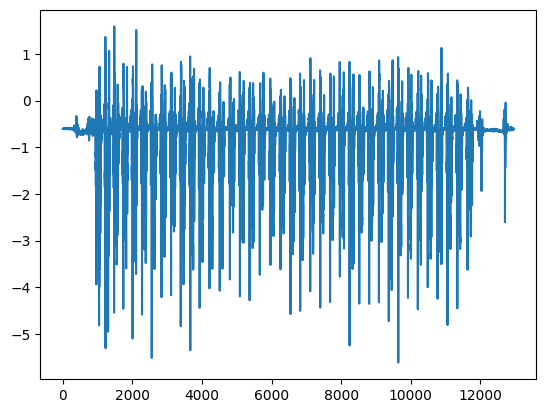

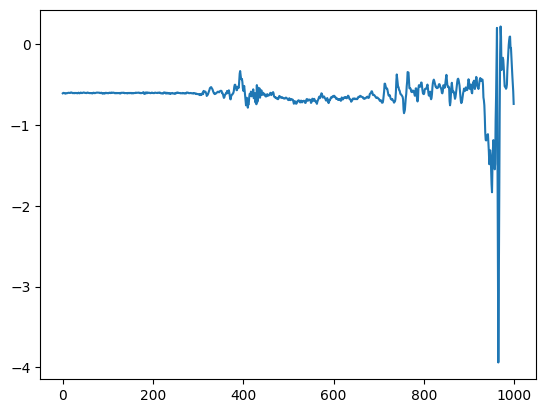

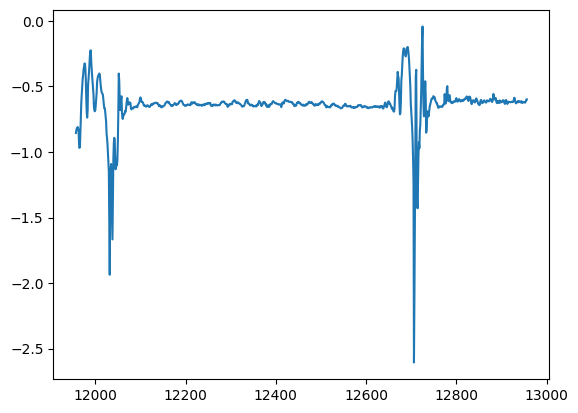

In [359]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

subjects = {
    'sub_01': 'Akram Shojaei',
    'sub_02': 'Ali Aghapour',
    'sub_03': 'Behnaz Behara',
    'sub_04': 'Farzad Moghaddam',
    'sub_05': 'Hasti Keshavarzi',
    'sub_06': 'Maliheh Maleki',
    'sub_07': 'Masud Bak Khoshnevis',
    'sub_08': 'Mobina Jamali',
    'sub_09': 'Nadia Khalili',
    'sub_10': 'Shahab Meghdadi',
    'sub_11': 'Shayan Farab',
    'sub_12': 'Soroush Rezaei'
}

conditions = [
    '1) walking normal',
    '2) walking fast',
    '3) weight normal',
    '4) weight fast',
    '5) brace normal',
    '6) brace fast',
    '7) brace_weight normal',
    '8) brace_weight fast'
]

input_file_names_1 = [
    'RAW_walking normal.csv',
    'RAW_walking fast.csv',
    'RAW_weight normal.csv',
    'RAW_weight fast.csv',
    'RAW_brace normal.csv',
    'RAW_brace fast.csv',
    'RAW_brace weight normal.csv',
    'RAW_brace weight fast.csv'
]


input_file_names_2 = [
    'walking normal.csv',
    'walking fast.csv',
    'weight normal.csv',
    'weight fast.csv',
    'brace normal.csv',
    'brace fast.csv',
    'brace weight normal.csv',
    'brace weight fast.csv'
]

input_file_names_3 = [
    'walking normal_Euler.csv',
    'walking fast_Euler.csv',
    'weight normal_Euler.csv',
    'weight fast_Euler.csv',
    'brace normal_Euler.csv',
    'brace fast_Euler.csv',
    'brace weight normal_Euler.csv',
    'brace weight fast_Euler.csv'
]

input_file_names_4 = [
    'walking normal_Joints_Kinematics.csv',
    'walking fast_Joints_Kinematics.csv',
    'weight normal_Joints_Kinematics.csv',
    'weight fast_Joints_Kinematics.csv',
    'brace normal_Joints_Kinematics.csv',
    'brace fast_Joints_Kinematics.csv',
    'brace weight normal_Joints_Kinematics.csv',
    'brace weight fast_Joints_Kinematics.csv'
]

num = 6
selected_condition = conditions[num]
selected_file_name_1 = input_file_names_1[num]
selected_file_name_2 = input_file_names_2[num]
selected_file_name_3 = input_file_names_3[num]
selected_file_name_4 = input_file_names_4[num]

selected_sub = 'sub_12'

base_dir = 'C:/Users/Arash/Desktop/Hanieh Moradi - Dataset/'

input_dir = os.path.join(base_dir, 'modified data', selected_sub,
                         selected_condition.replace(') ', '_').replace('\\', '/'))

input_filename_1 = os.path.join(input_dir, selected_file_name_1).replace('\\', '/')
input_filename_2 = os.path.join(input_dir, selected_file_name_2).replace('\\', '/')
input_filename_3 = os.path.join(input_dir, selected_file_name_3).replace('\\', '/')
input_filename_4 = os.path.join(input_dir, selected_file_name_4).replace('\\', '/')


data_1 = pd.read_csv(input_filename_1)
data_2 = pd.read_csv(input_filename_2)
data_3 = pd.read_csv(input_filename_3)
data_4 = pd.read_csv(input_filename_4)


plt.plot(data_1['AccY_LeftFoot'])
plt.show()
plt.plot(data_1['AccY_LeftFoot'].iloc[:1000])
plt.show()
plt.plot(data_1['AccY_LeftFoot'].iloc[-1000:])
plt.show()

In [352]:
# start_mod = [200:10300]
# finish_mod =

data_mod_1 = data_1.iloc[:12600]
data_mod_1 = data_mod_1.reset_index(drop=True)
data_mod_2 = data_2.iloc[:12600]
data_mod_2 = data_mod_2.reset_index(drop=True)
data_mod_3 = data_3.iloc[:12600]
data_mod_3 = data_mod_3.reset_index(drop=True)
data_mod_4 = data_4.iloc[:12600]
data_mod_4 = data_mod_4.reset_index(drop=True)

base_dir_mod = 'C:/Users/Arash/Desktop/Hanieh Moradi - Dataset/dataset_mod/'

# Step 1: Construct the Output Directory Path
output_dir = os.path.join(base_dir_mod, 'modified data', selected_sub, selected_condition.replace(') ', '_').replace('\\', '/'))

# Step 2: Ensure the Directory Exists
os.makedirs(output_dir, exist_ok=True)

# Step 3: Construct the Output Filename
output_filename_1 = os.path.join(output_dir, selected_file_name_1).replace('\\', '/')
output_filename_2 = os.path.join(output_dir, selected_file_name_2).replace('\\', '/')
output_filename_3 = os.path.join(output_dir, selected_file_name_3).replace('\\', '/')
output_filename_4 = os.path.join(output_dir, selected_file_name_4).replace('\\', '/')

# Now, you can proceed to save your data to output_filename
# For example, if 'data' is your DataFrame:
data_mod_1.to_csv(output_filename_1, index=False)
data_mod_2.to_csv(output_filename_2, index=False)
data_mod_3.to_csv(output_filename_3, index=False)
data_mod_4.to_csv(output_filename_4, index=False)